In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Python ile Makine Öğrenmesi/Denemeler/Uyku Sağlığı'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Python ile Makine Öğrenmesi/Denemeler/Uyku Sağlığı
 Sleep_health_and_lifestyle_dataset.csv  'Uyku Sağlığı.ipynb'


In [15]:
import pandas as pd
from sklearn import preprocessing

Verinin yüklenmesi ve incelenmesi

In [132]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
print(data.sample(5).T)
print(data.info())

                            44      78           289       335         230
Person ID                    45      79          290       336         231
Gender                     Male    Male       Female    Female      Female
Age                          31      33           50        54          44
Occupation               Doctor  Doctor        Nurse  Engineer     Teacher
Sleep Duration              7.7     6.0          6.1       8.4         6.6
Quality of Sleep              7       6            6         9           7
Physical Activity Level      75      30           90        30          45
Stress Level                  6       8            8         3           4
BMI Category             Normal  Normal   Overweight    Normal  Overweight
Blood Pressure           120/80  125/80       140/95    125/80      135/90
Heart Rate                   70      72           75        65          65
Daily Steps                8000    5000        10000      5000        6000
Sleep Disorder           

In [133]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Kullanılmayacak olan `Person ID` değeri kaldırılıyor

In [134]:
data = data.iloc[:,1:]
dataset = data.copy()
dataset

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


`Gender` sütunu üzerine `LabelEncoder` uygulanıyor

In [135]:
le = preprocessing.LabelEncoder()
dataset['Gender'] = le.fit_transform(data['Gender'])
print(list(le.classes_))
dataset.head(3)

['Female', 'Male']


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


`BMI Category` sütunu üzerine `LabelEncoder ve OneHotEncoder` uygulanıyor

In [136]:
le = preprocessing.LabelEncoder()
dataset['BMI Category'] = le.fit_transform(data['BMI Category'])
print(list(le.classes_))

ohe = preprocessing.OneHotEncoder()
BMI_Category = ohe.fit_transform(dataset.iloc[:,7:8]).toarray()
BMI_Category_df = pd.DataFrame(BMI_Category, columns=list(le.classes_))
dataset = pd.concat([dataset.iloc[:,:7], BMI_Category_df, dataset.iloc[:,8:]], axis=1)
dataset

['Normal', 'Normal Weight', 'Obese', 'Overweight']


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Normal,Normal Weight,Obese,Overweight,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,0.0,0.0,0.0,1.0,126/83,77,4200,None
1,1,28,Doctor,6.2,6,60,8,1.0,0.0,0.0,0.0,125/80,75,10000,None
2,1,28,Doctor,6.2,6,60,8,1.0,0.0,0.0,0.0,125/80,75,10000,None
3,1,28,Sales Representative,5.9,4,30,8,0.0,0.0,1.0,0.0,140/90,85,3000,Sleep Apnea
4,1,28,Sales Representative,5.9,4,30,8,0.0,0.0,1.0,0.0,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,0.0,0.0,0.0,1.0,140/95,68,7000,Sleep Apnea
370,0,59,Nurse,8.0,9,75,3,0.0,0.0,0.0,1.0,140/95,68,7000,Sleep Apnea
371,0,59,Nurse,8.1,9,75,3,0.0,0.0,0.0,1.0,140/95,68,7000,Sleep Apnea
372,0,59,Nurse,8.1,9,75,3,0.0,0.0,0.0,1.0,140/95,68,7000,Sleep Apnea


`Occupation` sütunu üzerine `LabelEncoder ve OneHotEncoder ` uygulanıyor

In [137]:
le = preprocessing.LabelEncoder()
dataset['Occupation'] = le.fit_transform(data['Occupation'])
print(list(le.classes_))

['Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse', 'Sales Representative', 'Salesperson', 'Scientist', 'Software Engineer', 'Teacher']


In [138]:
ohe = preprocessing.OneHotEncoder()
BMI_Category = ohe.fit_transform(dataset.iloc[:,2:3]).toarray()
BMI_Category_df = pd.DataFrame(BMI_Category, columns=list(le.classes_))
dataset = pd.concat([dataset.iloc[:,:2], BMI_Category_df, dataset.iloc[:,3:]], axis=1)
dataset

,Gender,Age,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,...,Physical Activity Level,Stress Level,Normal,Normal Weight,Obese,Overweight,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42,6,0.0,0.0,0.0,1.0,126/83,77,4200,None
1,1,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60,8,1.0,0.0,0.0,0.0,125/80,75,10000,None
2,1,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60,8,1.0,0.0,0.0,0.0,125/80,75,10000,None
3,1,28,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,30,8,0.0,0.0,1.0,0.0,140/90,85,3000,Sleep Apnea
4,1,28,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,30,8,0.0,0.0,1.0,0.0,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,75,3,0.0,0.0,0.0,1.0,140/95,68,7000,Sleep Apnea
370,0,59,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,75,3,0.0,0.0,0.0,1.0,140/95,68,7000,Sleep Apnea
371,0,59,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,75,3,0.0,0.0,0.0,1.0,140/95,68,7000,Sleep Apnea
372,0,59,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,75,3,0.0,0.0,0.0,1.0,140/95,68,7000,Sleep Apnea


`Blood Pressure` sütunu için bölme işlemi yapıldı

In [139]:
Blood_Pressure = data[['Blood Pressure']].copy()
Blood_Pressure[['High Blood Pressure', 'Low Blood Pressure']] = Blood_Pressure['Blood Pressure'].str.split('/', expand=True)
Blood_Pressure.drop(columns=['Blood Pressure'], inplace=True)
dataset[['High Blood Pressure', 'Low Blood Pressure']] = Blood_Pressure
dataset.drop(['Blood Pressure'], axis=1, inplace=True)
dataset.head(3)

,Gender,Age,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,...,Stress Level,Normal,Normal Weight,Obese,Overweight,Heart Rate,Daily Steps,Sleep Disorder,High Blood Pressure,Low Blood Pressure
0,1,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,0.0,0.0,0.0,1.0,77,4200,None,126,83
1,1,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,1.0,0.0,0.0,0.0,75,10000,None,125,80
2,1,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,1.0,0.0,0.0,0.0,75,10000,None,125,80


# **Makine Öğrenmesi Algoritması**

In [158]:
x = dataset.drop(columns=['Sleep Disorder'])
y = dataset[['Sleep Disorder']]

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)
print(cm)

0.8849557522123894
[[18  2  3]
 [ 2 62  2]
 [ 1  3 20]]


# **Boyut İndirgeme**

In [169]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

gnb_lda = GaussianNB()
gnb_lda.fit(X_train_lda, y_train)

y_pred_lda = gnb_lda.predict(X_test_lda)

cm2 = confusion_matrix(y_pred,y_pred_lda)
acc2 = accuracy_score(y_test, y_pred_lda)
print(acc2)
print(cm2)

0.911504424778761
[[20  1  0]
 [ 0 66  1]
 [ 2  1 22]]


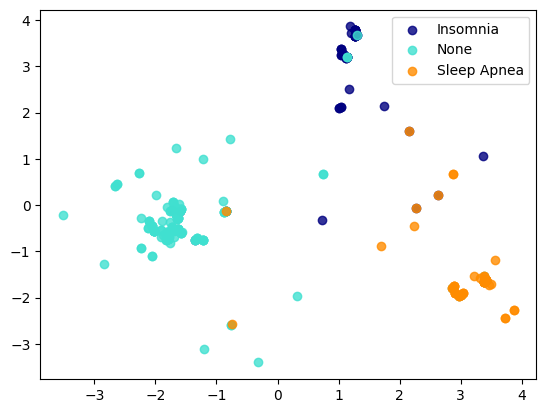

In [242]:
import matplotlib.pyplot as plt
colors = ["navy", "turquoise", "darkorange"]
target_names = ['Insomnia', 'None', 'Sleep Apnea']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=0.8, color=color, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)